In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('fake_or_real_news.csv')
data = data.set_index("Unnamed: 0")
data2 = data.copy() # Store for later for topic modeling
data.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
data.shape

(6335, 3)

In [10]:
y = data

In [11]:
y.drop("label",axis=1)
y.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
y['text'] = y['text'].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
y['text'] = y['title'].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

#filter out numbers
# df[df['id'].apply(lambda x: isinstance(x, (int, np.int64)))]
#Lemmatize all words

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.33, random_state=53)

In [14]:
# Use tf-idf and count vectorizer to find most relevant words in corpus
# TfidfVectorizer should remove stop words and words that appear in more than 70% of the articles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english') # already gets rid of stop words
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  
tfidf_test = tfidf_vectorizer.transform(X_test)

In [15]:
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[:10])

['zealand', 'zealots', 'zero', 'zika', 'zion', 'zionist', 'zone', 'zuckerberg', 'zuesse', 'zulu']
['00', '000', '00pm', '01', '04', '05', '08', '10', '100', '1000s']


In [16]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zealand,zealots,zero,zika,zion,zionist,zone,zuckerberg,zuesse,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
count_df.describe()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zealand,zealots,zero,zika,zion,zionist,zone,zuckerberg,zuesse,zulu
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.000236,0.007069,0.000707,0.000236,0.000236,0.000236,0.000236,0.004241,0.002828,0.000236,...,0.000236,0.000236,0.000471,0.001414,0.000236,0.000943,0.000236,0.000236,0.000471,0.000236
std,0.015350,0.086555,0.026581,0.015350,0.015350,0.015350,0.015350,0.064995,0.053105,0.015350,...,0.015350,0.015350,0.021706,0.048527,0.015350,0.030689,0.015350,0.015350,0.021706,0.015350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.describe()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zealand,zealots,zero,zika,zion,zionist,zone,zuckerberg,zuesse,zulu
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.000103,0.001975,0.000369,0.000057,0.000099,0.000102,0.000113,0.001506,0.000945,0.000096,...,0.000106,0.000076,0.000185,0.000479,0.000087,0.000384,0.000106,0.000077,0.000176,0.000070
std,0.006726,0.024248,0.013885,0.003711,0.006436,0.006636,0.007351,0.023411,0.018112,0.006266,...,0.006881,0.004936,0.008633,0.015716,0.005677,0.012786,0.006904,0.004987,0.008108,0.004542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.438188,0.427285,0.539284,0.241785,0.419254,0.432281,0.478901,0.458575,0.467593,0.408217,...,0.448298,0.321555,0.454209,0.584929,0.369809,0.491264,0.449780,0.324874,0.401211,0.295885


set()

In [20]:
print(count_df.equals(tfidf_df)) # check if the vectorizers extracted different tokens

False


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# MultinomialNB
multi_nb = MultinomialNB()
np.shape(tfidf_train)
np.shape(y_train)
multi_nb.fit(tfidf_train, y_train['label'])
pred = multi_nb.predict(tfidf_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score) # Multinomial Naive Bayes accuracy: 0.857

accuracy:   0.800


In [22]:
# Use a confusion matrix to compare accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test['label'], pred, labels=['FAKE', 'REAL'])

In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


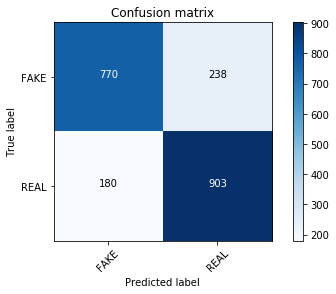

In [24]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

In [25]:
count_multi_nb = MultinomialNB()
count_multi_nb.fit(count_train,y_train['label'])
c_pred = count_multi_nb.predict(count_test)
c_score = accuracy_score(y_test['label'],pred)
print("accuracy:   %0.3f" % c_score)
# this isn't outperforming tf-idf for some reason

accuracy:   0.800


accuracy:   0.762


/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Confusion matrix, without normalization


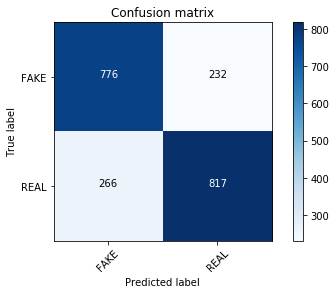

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train['label'])
pred = linear_clf.predict(tfidf_test)
linear_score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % linear_score)
linear_cm = confusion_matrix(y_test['label'], pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(linear_cm, classes=['FAKE', 'REAL'])
plt.show()

In [27]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train['label'])
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test['label'], pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.74892
Alpha: 0.10 Score: 0.78192
Alpha: 0.20 Score: 0.79149
Alpha: 0.30 Score: 0.79723
Alpha: 0.40 Score: 0.79914
Alpha: 0.50 Score: 0.79962
Alpha: 0.60 Score: 0.80105
Alpha: 0.70 Score: 0.80153
Alpha: 0.80 Score: 0.80010
Alpha: 0.90 Score: 0.80201


/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [28]:
# Convert into dummy variables
copy = tfidf_df.copy()
#copy['label'] = copy['label'].apply(lambda x: 1 if x == 'FAKE' else 0)

# Import into a pickle model
from sklearn.externals import joblib
joblib.dump(multi_nb, 'model.pkl')
model_columns = list(copy.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [29]:
#copy['label'] = copy['label'].apply(lambda x: 1 if x == 'FAKE' else 0)
# copy = pd.concat([copy,pd.get_dummies(copy['title'],drop_first=True,prefix="title")],axis=1)
# copy = pd.concat([copy,pd.get_dummies(copy['text'],drop_first=True,prefix="text")],axis=1)
# copy.drop(['title','text'],axis=1,inplace=True)



In [30]:
copy.shape

(4244, 7953)

In [31]:
def most_informative(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    for coef,feat in topn_class1:
        print(class_labels[0],coef,feat)    
    print()
    for coef,feat in reversed(topn_class2):
        print(class_labels[1],coef,feat)

In [32]:
most_informative(tfidf_vectorizer,linear_clf,n=30)

FAKE -4.6391277316103725 breaking
FAKE -4.571144420743092 comment
FAKE -4.369754989873483 mosul
FAKE -4.307108259232295 comey
FAKE -4.277335054743851 reopening
FAKE -3.74913768807283 podesta
FAKE -3.451514152144882 relative
FAKE -3.4041206497405185 aleppo
FAKE -3.401537276962395 privacy
FAKE -3.381771907521222 soros
FAKE -3.3631032314956584 information
FAKE -3.362527108629706 working
FAKE -3.339202076035613 funded
FAKE -3.3362357021839273 truthfeed
FAKE -3.251870673901556 germany
FAKE -3.2198523433881125 hillary
FAKE -3.208726835371661 elected
FAKE -3.196325469938962 coward
FAKE -3.12561423334515 jail
FAKE -3.1033047145116166 expect
FAKE -3.0879724537584003 circulated
FAKE -3.0839777593102844 defying
FAKE -3.077760500099996 cheat
FAKE -3.0307900147773132 voting
FAKE -3.0083892837917254 putin
FAKE -2.9928508414966104 gave
FAKE -2.9819031077337104 photo
FAKE -2.943141703747841 fifth
FAKE -2.942378648947346 kill
FAKE -2.93820634591541 complaints

REAL 4.9561765472023565 netanyahu
REAL 4.7

In [33]:
# Most real
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20] # zip coefficients and sort them

[(-5.1288689552455695, 'trump'),
 (-5.4360664149819975, 'clinton'),
 (-5.573741770858247, 'obama'),
 (-5.742332349732786, 'gop'),
 (-5.889696579442313, 'debate'),
 (-5.9722939459904545, 'donald'),
 (-6.074913885605415, 'sanders'),
 (-6.151738347876751, 'hillary'),
 (-6.249205069235174, '2016'),
 (-6.293766969120718, 'house'),
 (-6.305141151054523, 'cruz'),
 (-6.3521206343371714, 'new'),
 (-6.355371439656233, 'republicans'),
 (-6.440543494501846, 'says'),
 (-6.443561966858925, 'iran'),
 (-6.470970196555513, 'deal'),
 (-6.519393162723352, 'bush'),
 (-6.5791861105844225, 'bernie'),
 (-6.613942911815267, 'rubio'),
 (-6.625459522913771, 'campaign')]

In [34]:
# Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-9.529837695420117, '00'),
 (-9.529837695420117, '00pm'),
 (-9.529837695420117, '01'),
 (-9.529837695420117, '04'),
 (-9.529837695420117, '05'),
 (-9.529837695420117, '1000s'),
 (-9.529837695420117, '100k'),
 (-9.529837695420117, '100percentfedup'),
 (-9.529837695420117, '116'),
 (-9.529837695420117, '117'),
 (-9.529837695420117, '11th'),
 (-9.529837695420117, '120'),
 (-9.529837695420117, '125'),
 (-9.529837695420117, '130'),
 (-9.529837695420117, '141'),
 (-9.529837695420117, '160'),
 (-9.529837695420117, '180'),
 (-9.529837695420117, '184'),
 (-9.529837695420117, '1862'),
 (-9.529837695420117, '1940s')]

In [35]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


accuracy:   0.779
Confusion matrix, without normalization


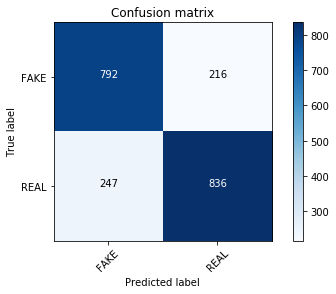

In [37]:
clf = MultinomialNB(alpha=.01)
clf.fit(hash_train, y_train['label'])
pred = clf.predict(hash_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test['label'], pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

In [38]:
# defining fake news with simple bag-of-words or TF-IDF vectors is an oversimplified approach

In [39]:
# look up how to make an ROC curve

In [40]:
# TODO: LDA Vis, 10-fold CV, preprocessing, removing stop words

In [41]:
# Visualizations of fake news categories
# Features most associated with the different fake news categories
# Domain names, sentiment analysis

In [42]:
fake_dataset = pd.read_csv('fake.csv')

In [43]:
fake_dataset.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [44]:
fake_dataset.shape

(12999, 20)

In [45]:
fake_dataset.type.unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

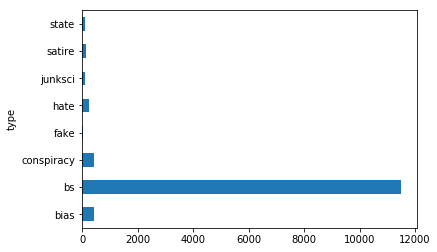

In [46]:
fake_dataset.groupby(['type']).size().plot(kind='barh')
plt.show()

In [2]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
# import spacy
import pyLDAvis
import pyLDAvis.gensim

import nltk
nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]   

[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/victoriacabales/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /Users/victoriacabales

In [25]:
article_text = data2['text'][0:500].str.cat(sep=' ').lower() # Take first 500 reviews and parse in nltk
article_text = word_tokenize(article_text)
headline_text = data2['title'][0:500].str.cat(sep=' ').lower()
headline_text = word_tokenize(headline_text)

In [ ]:
#stop_dict = spacy.lang.en.English.Defaults.stop_words
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # You may need to run this first
stop_array = (stopwords.words('english'))
#set(stopwords.words('english'))

In [ ]:
# Remove all stop words from larger corpora
# This will take a lot of time because there's a lot of data

for token in headline_text:
    if token in stop_array:
        headline_text.remove(token)
        
for token in article_text:
    if token in stop_array:
        article_text.remove(token)

In [23]:
# POS tag and then stem


In [9]:
# Lemmatize the words
# Might need to tag parts of speech first and lemmatize based on that
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

headline_lemma = []
article_lemma = []

for token in headline_text:
    headline_lemma.append(lemmatizer.stem(token))

for token in article_text:
    article_lemma.append(lemmatizer.stem(token))

In [10]:
from nltk.probability import FreqDist
# Parse out words that appear too often

fdist1 = FreqDist(headline_text)
fdist1

In [ ]:
# Save separate file with bigrams and see if they enhance text classification